# **Таня вар 2**

## Задание 1

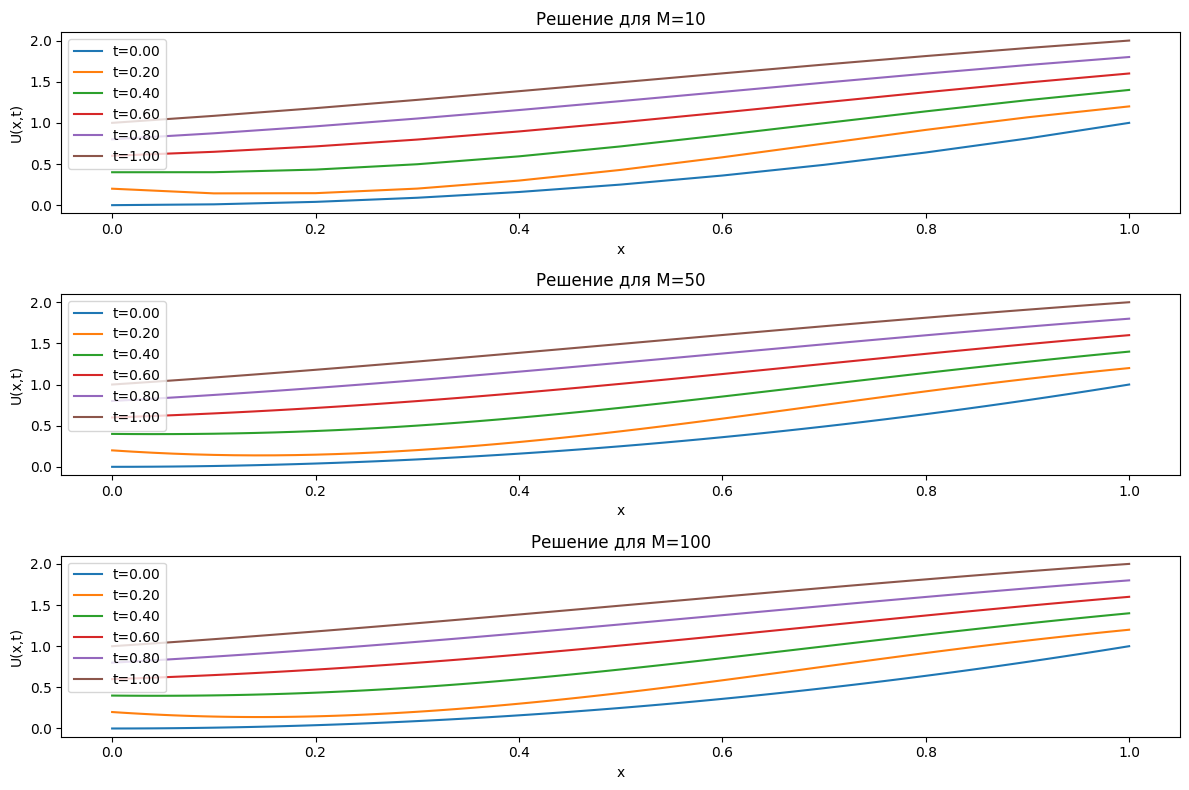

[0.99995    1.00805373 1.01625611 1.02455575 1.03295124 1.04144115
 1.05002399 1.05869828 1.06746248 1.07631503 1.08525437 1.09427887
 1.10338691 1.11257681 1.1218469  1.13119545 1.14062074 1.150121
 1.15969444 1.16933926 1.17905362 1.18883567 1.19868354 1.20859532
 1.21856912 1.22860298 1.23869496 1.24884309 1.25904537 1.26929979
 1.27960435 1.28995699 1.30035566 1.3107983  1.32128284 1.33180716
 1.34236918 1.35296678 1.36359783 1.3742602  1.38495174 1.39567031
 1.40641375 1.41717989 1.42796657 1.43877161 1.44959284 1.46042808
 1.47127515 1.48213186 1.49299604 1.50386549 1.51473805 1.52561153
 1.53648375 1.54735256 1.55821577 1.56907123 1.57991679 1.5907503
 1.60156962 1.61237262 1.62315718 1.63392119 1.64466255 1.65537917
 1.66606898 1.67672992 1.68735995 1.69795703 1.70851914 1.71904429
 1.7295305  1.7399758  1.75037825 1.76073591 1.77104689 1.78130929
 1.79152126 1.80168094 1.81178652 1.82183619 1.83182819 1.84176076
 1.85163217 1.86144073 1.87118475 1.88086258 1.8904726  1.9000132

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def solve_heat_equation(M=10, T=1.0):
    h = 1.0 / M
    tau = h**2 / 2  # для устойчивости

    N = int(np.ceil(T / tau)) + 1
    tau = T / (N - 1)  # корректируем tau для точного попадания в T

    x = np.linspace(0, 1, M+1)
    t = np.linspace(0, T, N)

    U = np.zeros((M+1, N))

    # Начальное условие
    U[:, 0] = x**2

    # Граничные условия
    U[0, :] = t
    U[-1, :] = 1 + t

    for n in range(N-1):
        for m in range(1, M):
            tn = t[n]
            xm = x[m]

            d2u = (U[m+1, n] - 2*U[m, n] + U[m-1, n]) / h**2
            du = (U[m+1, n] - U[m-1, n]) / (2*h)

            U[m, n+1] = U[m, n] + tau * (tn * d2u + xm * du + xm * tn)

    return x, t, U

# Решение для разных сеток
x10, t10, U10 = solve_heat_equation(M=10)
x50, t50, U50 = solve_heat_equation(M=50)
x100, t100, U100 = solve_heat_equation(M=100)

# Визуализация
plt.figure(figsize=(12, 8))

# Графики для M=10
plt.subplot(3, 1, 1)
for n in range(0, len(t10), len(t10)//5):
    plt.plot(x10, U10[:, n], label=f't={t10[n]:.2f}')
plt.title('Решение для M=10')
plt.xlabel('x')
plt.ylabel('U(x,t)')
plt.legend()

# Графики для M=50
plt.subplot(3, 1, 2)
for n in range(0, len(t50), len(t50)//5):
    plt.plot(x50, U50[:, n], label=f't={t50[n]:.2f}')
plt.title('Решение для M=50')
plt.xlabel('x')
plt.ylabel('U(x,t)')
plt.legend()

# Графики для M=100
plt.subplot(3, 1, 3)
for n in range(0, len(t100), len(t100)//5):
    plt.plot(x100, U100[:, n], label=f't={t100[n]:.2f}')
plt.title('Решение для M=100')
plt.xlabel('x')
plt.ylabel('U(x,t)')
plt.legend()

plt.tight_layout()
plt.show()
print(U[:, -1])

## Задание 2

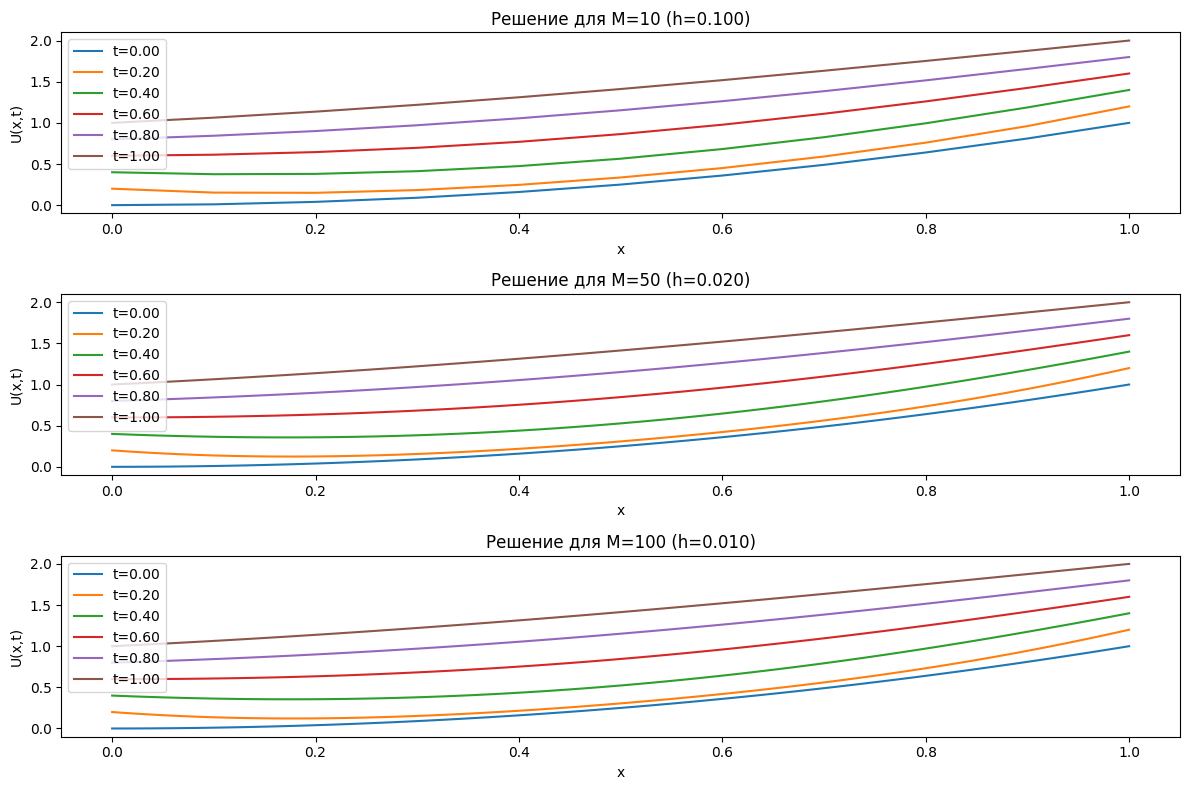

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def solve_implicit(M=10, T=1.0):
    h = 1.0 / M
    tau = h

    N = int(np.ceil(T / tau)) + 1
    tau = T / (N - 1)

    x = np.linspace(0, 1, M+1)
    t = np.linspace(0, T, N)

    U = np.zeros((M+1, N))
    U[:, 0] = x**2  # Начальное условие

    for n in range(N-1):
        tn1 = t[n+1]
        sigma = tau * tn1 / h**2

        # Прямой ход прогонки
        alpha = np.zeros(M)
        beta = np.zeros(M)
        alpha[0] = 0
        beta[0] = tn1  # U(0,t) = t

        for m in range(1, M):
            denom = 1 + 2*sigma - sigma * alpha[m-1]
            alpha[m] = sigma / denom
            beta[m] = (sigma * beta[m-1] + U[m, n] + tau * x[m] * tn1) / denom

        # Обратный ход
        U[M, n+1] = 1 + tn1  # U(1,t) = 1 + t
        for m in range(M-1, -1, -1):
            U[m, n+1] = alpha[m] * U[m+1, n+1] + beta[m]

    return x, t, U

# Решение для разных сеток
x10, t10, U10 = solve_implicit(M=10)
x50, t50, U50 = solve_implicit(M=50)
x100, t100, U100 = solve_implicit(M=100)

# Визуализация
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
for n in range(0, len(t10), len(t10)//5):
    plt.plot(x10, U10[:, n], label=f't={t10[n]:.2f}')
plt.title(f'Решение для M=10 (h={x10[1]-x10[0]:.3f})')
plt.xlabel('x')
plt.ylabel('U(x,t)')
plt.legend()

plt.subplot(3, 1, 2)
for n in range(0, len(t50), len(t50)//5):
    plt.plot(x50, U50[:, n], label=f't={t50[n]:.2f}')
plt.title(f'Решение для M=50 (h={x50[1]-x50[0]:.3f})')
plt.xlabel('x')
plt.ylabel('U(x,t)')
plt.legend()

# Графики для M=50
plt.subplot(3, 1, 3)
for n in range(0, len(t100), len(t100)//5):
    plt.plot(x100, U100[:, n], label=f't={t100[n]:.2f}')
plt.title(f'Решение для M=100 (h={x100[1]-x100[0]:.3f})')
plt.xlabel('x')
plt.ylabel('U(x,t)')
plt.legend()

plt.tight_layout()
plt.show()

# **Варя вар 1**

## Задание 1

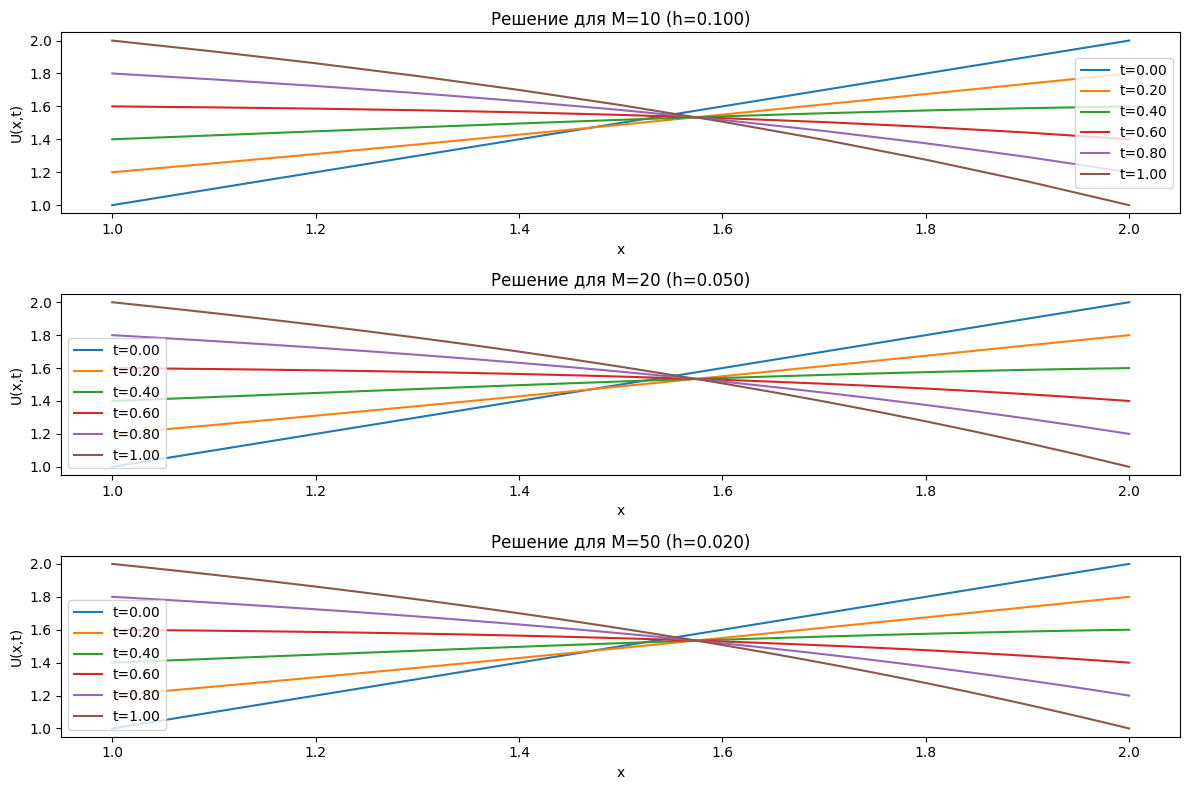

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def solve_new_equation(M=10, T=1.0):
    a = 1.0  # левая граница по x
    b = 2.0  # правая граница по x
    h = (b - a) / M  # шаг по пространству
    # Коэффициент 5 перед второй производной требует меньшего шага по времени
    tau = h**2 / (2 * 5)  # условие устойчивости

    N = int(np.ceil(T / tau)) + 1
    tau = T / (N - 1)  # корректировка tau

    x = np.linspace(a, b, M+1)
    t = np.linspace(0, T, N)

    U = np.zeros((M+1, N))

    # Начальное условие
    U[:, 0] = x

    # Граничные условия
    U[0, :] = 1 + t  # U(1,t) = 1 + t
    U[-1, :] = 2 - t  # U(2,t) = 2 - t

    for n in range(N-1):
        for m in range(1, M):
            xm = x[m]
            tn = t[n]

            # Разностные операторы
            d2u = (U[m+1, n] - 2*U[m, n] + U[m-1, n]) / h**2
            du = (U[m+1, n] - U[m-1, n]) / (2*h)
            source = 3 * tn * np.sin(xm)

            U[m, n+1] = U[m, n] + tau * (5*d2u - xm*du + source)

    return x, t, U

# Решение для разных сеток
x10, t10, U10 = solve_new_equation(M=10)
x20, t20, U20 = solve_new_equation(M=20)
x50, t50, U50 = solve_new_equation(M=50)

# Визуализация
plt.figure(figsize=(12, 8))

# Графики для M=10
plt.subplot(3, 1, 1)
for n in range(0, len(t10), len(t10)//5):
    plt.plot(x10, U10[:, n], label=f't={t10[n]:.2f}')
plt.title(f'Решение для M=10 (h={x10[1]-x10[0]:.3f})')
plt.xlabel('x')
plt.ylabel('U(x,t)')
plt.legend()

# Графики для M=20
plt.subplot(3, 1, 2)
for n in range(0, len(t20), len(t20)//5):
    plt.plot(x20, U20[:, n], label=f't={t20[n]:.2f}')
plt.title(f'Решение для M=20 (h={x20[1]-x20[0]:.3f})')
plt.xlabel('x')
plt.ylabel('U(x,t)')
plt.legend()

# Графики для M=50
plt.subplot(3, 1, 3)
for n in range(0, len(t50), len(t50)//5):
    plt.plot(x50, U50[:, n], label=f't={t50[n]:.2f}')
plt.title(f'Решение для M=50 (h={x50[1]-x50[0]:.3f})')
plt.xlabel('x')
plt.ylabel('U(x,t)')
plt.legend()

plt.tight_layout()
plt.show()

## Задание 2

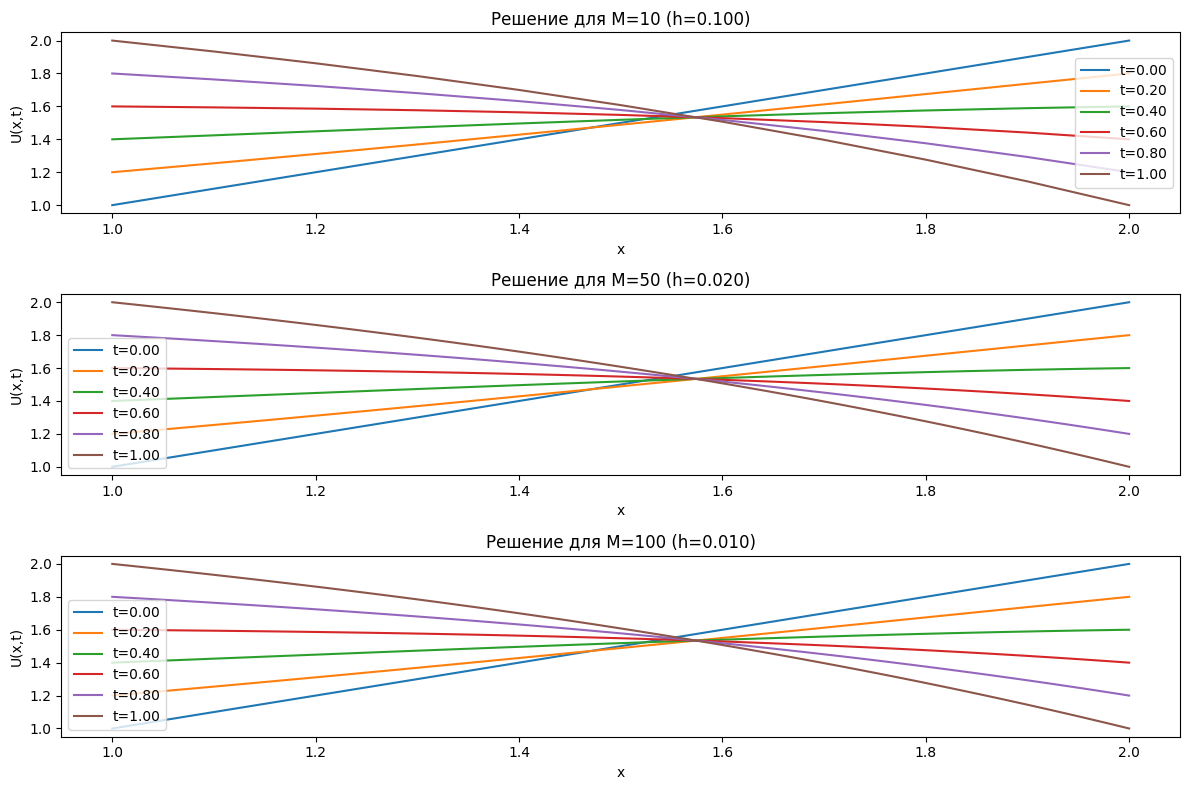

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def solve_equation(M=10, T=1.0):
    a, b = 1.0, 2.0  # границы по x
    h = (b - a) / M
    tau = h**2 / (2 * 5)  # устойчивость при tau ≤ h²/(2*5)

    N = int(np.ceil(T / tau)) + 1
    tau = T / (N - 1)

    x = np.linspace(a, b, M+1)
    t = np.linspace(0, T, N)
    U = np.zeros((M+1, N))
    U[:, 0] = x  # начальное условие

    for n in range(N-1):
        tn1 = t[n+1]
        # Прямой ход прогонки
        alpha = np.zeros(M+1)
        beta = np.zeros(M+1)
        alpha[0] = 0
        beta[0] = 1 + tn1  # U(1,t) = 1 + t

        for m in range(1, M):
            A = 5*tau/h**2 - x[m]*tau/(2*h)
            B = 1 + 10*tau/h**2
            C = 5*tau/h**2 + x[m]*tau/(2*h)
            F = U[m, n] + 3*tau*tn1*np.sin(x[m])

            alpha[m] = A / (B - C*alpha[m-1])
            beta[m] = (F + C*beta[m-1]) / (B - C*alpha[m-1])

        # Обратный ход
        U[M, n+1] = 2 - tn1  # U(2,t) = 2 - t
        for m in range(M-1, -1, -1):
            U[m, n+1] = alpha[m] * U[m+1, n+1] + beta[m]

    return x, t, U

# Расчет для трех сеток
x10, t10, U10 = solve_equation(M=10)
x50, t50, U50 = solve_equation(M=50)
x100, t100, U100 = solve_equation(M=100)

# Визуализация
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
for n in range(0, len(t10), len(t10)//5):
    plt.plot(x10, U10[:, n], label=f't={t10[n]:.2f}')
plt.title(f'Решение для M=10 (h={x10[1]-x10[0]:.3f})')
plt.xlabel('x')
plt.ylabel('U(x,t)')
plt.legend()

plt.subplot(3, 1, 2)
for n in range(0, len(t50), len(t50)//5):
    plt.plot(x50, U50[:, n], label=f't={t50[n]:.2f}')
plt.title(f'Решение для M=50 (h={x50[1]-x50[0]:.3f})')
plt.xlabel('x')
plt.ylabel('U(x,t)')
plt.legend()

# Графики для M=50
plt.subplot(3, 1, 3)
for n in range(0, len(t100), len(t100)//5):
    plt.plot(x100, U100[:, n], label=f't={t100[n]:.2f}')
plt.title(f'Решение для M=100 (h={x100[1]-x100[0]:.3f})')
plt.xlabel('x')
plt.ylabel('U(x,t)')
plt.legend()

plt.tight_layout()
plt.show()